## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
from sklearn import svm
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split,cross_val_score


from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,log_loss


from sklearn import tree,ensemble,metrics

## To exclude warnings

In [3]:
import warnings
import random
warnings.filterwarnings("ignore")

## Loading dataset

In [4]:
data=pd.read_csv("framingham.csv")

## Attribute Information:

In [5]:
data.shape

(4240, 16)

In [6]:
data.TenYearCHD.value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

In [7]:
data.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

### head

In [8]:
print(data.head())

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

### info 

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB
None


### describe

In [10]:
print(data.describe())

              male          age    education  currentSmoker   cigsPerDay  \
count  4240.000000  4240.000000  4135.000000    4240.000000  4211.000000   
mean      0.429245    49.580189     1.979444       0.494104     9.005937   
std       0.495027     8.572942     1.019791       0.500024    11.922462   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4187.000000      4240.000000   4240.000000  4240.000000  4190.000000   
mean      0.029615         0.005896      0.310613     0.025708   236.699523   
std       0.169544         0.076569      0.462799     0.158280    44.591284   

### unique values of target column

In [11]:
data.TenYearCHD.unique()

array([0, 1], dtype=int64)

In [12]:
data.TenYearCHD.value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

## Patients having heart disease

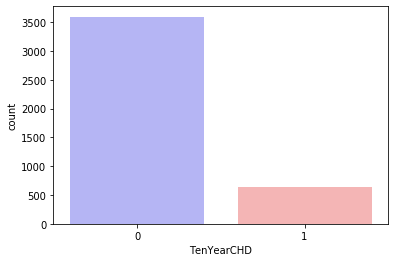

In [13]:
sns.countplot(x="TenYearCHD", data=data, palette="bwr")
plt.show()

## checking null values values

In [14]:
print(data.isnull().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


# Preprocessing

In [15]:
print(data["education"].value_counts())

1.0    1720
2.0    1253
3.0     689
4.0     473
Name: education, dtype: int64


In [16]:
print(data['cigsPerDay'].value_counts())

0.0     2145
20.0     734
30.0     218
15.0     210
10.0     143
9.0      130
5.0      121
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
6.0       18
2.0       18
7.0       12
8.0       11
60.0      11
4.0        9
18.0       8
17.0       7
50.0       6
23.0       6
11.0       5
45.0       3
16.0       3
13.0       3
12.0       3
14.0       2
19.0       2
70.0       1
38.0       1
29.0       1
Name: cigsPerDay, dtype: int64


In [17]:
print(data['BPMeds'].value_counts())

0.0    4063
1.0     124
Name: BPMeds, dtype: int64


In [18]:
print(data['totChol'].value_counts())

240.0    85
220.0    70
260.0    62
210.0    61
232.0    59
         ..
107.0     1
338.0     1
364.0     1
398.0     1
405.0     1
Name: totChol, Length: 248, dtype: int64


In [19]:
print(data['BMI'].value_counts())

23.48    18
22.19    18
22.91    18
22.54    18
23.09    16
         ..
41.29     1
31.40     1
18.65     1
19.50     1
27.46     1
Name: BMI, Length: 1364, dtype: int64


In [20]:
print(data['heartRate'].value_counts())

75.0     563
80.0     385
70.0     305
60.0     231
85.0     228
        ... 
143.0      1
130.0      1
51.0       1
46.0       1
97.0       1
Name: heartRate, Length: 73, dtype: int64


In [21]:
print(data['glucose'].value_counts())

75.0     193
77.0     167
73.0     156
80.0     153
70.0     152
        ... 
297.0      1
167.0      1
202.0      1
235.0      1
274.0      1
Name: glucose, Length: 143, dtype: int64


In [22]:
data['education'] = data.education.fillna(data.education.mean())
data['cigsPerDay'] = data.cigsPerDay.fillna(data.cigsPerDay.mean())
data['BPMeds'] = data.BPMeds.fillna(data.BPMeds.mean())
data['totChol'] = data.totChol.fillna(data.totChol.mean())
data['BMI'] = data.BMI.fillna(data.BMI.mean())
data['heartRate'] = data.heartRate.fillna(data.heartRate.mean())

data['glucose'] = data.glucose.fillna(data.glucose.mean())

In [23]:
print(data.isnull().sum())
X = data.iloc[:,:-1].values
y = data.iloc[:, 15].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =9)

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [24]:
data.TenYearCHD.value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

# Feature extraction

In [25]:
model = RandomForestClassifier()
rfe = RFE(model, 1)
fit = rfe.fit(X_train, y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 1
Selected Features: [False False False False False False False False False False False False
  True False False]
Feature Ranking: [10  6  9 12  8 13 15 11 14  3  2  5  1  7  4]


### FEATURE RANKING

In [26]:
X=data[['male','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose','TenYearCHD']]
feature_rank = pd.DataFrame(list(zip(fit.ranking_,X)),columns=['rank','feature'])
feature_rank = feature_rank.sort_values(by ='rank')
feature_rank

,rank,feature
12,1,BMI
10,2,sysBP
9,3,totChol
14,4,glucose
11,5,diaBP
1,6,age
13,7,heartRate
4,8,cigsPerDay
2,9,education
0,10,male


## Training data

In [27]:
y_values = data['TenYearCHD']

# all features
X = data.iloc[:,:-1].values


#X=data[['male','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose','TenYearCHD']]


X_train, X_test, y_train, y_test = train_test_split(X, y_values, test_size=0.3, random_state=42)


In [28]:
print('X_train.shape : ',X_train.shape)
print('X_test.shape : ',X_test.shape)
print('y_train.shape : ',y_train.shape)
print('y_test.shape : ',y_test.shape)

X_train.shape :  (2968, 15)
X_test.shape :  (1272, 15)
y_train.shape :  (2968,)
y_test.shape :  (1272,)


## Naive bayes

In [29]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
nb_y_pred = classifier.predict(X_test)

In [30]:
conf_mat = confusion_matrix(y_test, nb_y_pred)

print('Confusion Matrix')
print(conf_mat)


TP = conf_mat[0,0]
TN = conf_mat[1,1]
FP = conf_mat[0,1]
FN = conf_mat[1,0]


accuracyn = round( ((TP+TN)/(TP+TN+FP+FN))*100 ,2)
errorn = round((100 - accuracyn),2)

specificityn = round ( ((TN) / (TN + FP))*100,2 )
sensitivityn = round ( ((TP) / (TP+FN))*100 ,2 )
Recalln = round( ((TP)/(TP+FN))*100 , 2) #sensitivity
Precisionn = round( ((TP)/(TP+FP))*100 ,2 )
f1_scoren = round( ((2*Precisionn*Recalln)/(Precisionn+Recalln)) ,2 )


print("Accuracy                  : ",accuracyn)
print('Classification Error Rate : ', errorn)
print('specificity               : ',specificityn)
print('sensitivity or Recall     : ',sensitivityn)
print('Precision                 : ',Precisionn)
print('f1 score                  : ',f1_scoren)


Confusion Matrix
[[1010   67]
 [ 151   44]]
Accuracy                  :  82.86
Classification Error Rate :  17.14
specificity               :  39.64
sensitivity or Recall     :  86.99
Precision                 :  93.78
f1 score                  :  90.26


## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
lr_pred = clf.predict(X_test)

In [32]:
conf_mat = confusion_matrix(y_test, lr_pred)

print('Confusion Matrix')
print(conf_mat)

TP = conf_mat[0,0]
TN = conf_mat[1,1]
FP = conf_mat[0,1]
FN = conf_mat[1,0]

accuracyl = round( ((TP+TN)/(TP+TN+FP+FN))*100 , 2 )
errorl = round ( 100 - accuracyl ,2)

specificityl = round ( ((TN) / (TN + FP))*100 ,2)
sensitivityl = round ( ((TP) / (TP+FN))*100 ,2)
Recalll = round ( ((TP)/(TP+FN))*100 ,2) #sensitivity
Precisionl = round ( ( (TP)/(TP+FP) )*100 ,2)
f1_scorel = round ( ( (2*Precisionl*Recalll)/(Precisionl+Recalll) ) ,2)

print("Accuracy                  : ",accuracyl)
print('Classification Error Rate : ', errorl)
print('specificity               : ',specificityl)
print('sensitivity or Recall     : ',sensitivityl)
print('Precision                 : ',Precisionl)
print('f1 score                  : ',f1_scorel)

Confusion Matrix
[[1074    3]
 [ 189    6]]
Accuracy                  :  84.91
Classification Error Rate :  15.09
specificity               :  66.67
sensitivity or Recall     :  85.04
Precision                 :  99.72
f1 score                  :  91.8


## Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini')
classifier.fit(X_train, y_train)

# Predicting the Test set results
DT_y_pred = classifier.predict(X_test)

In [34]:
conf_mat = confusion_matrix(y_test, DT_y_pred)

print('Confusion Matrix')
print(conf_mat)

TP = conf_mat[0,0]
TN = conf_mat[1,1]
FP = conf_mat[0,1]
FN = conf_mat[1,0]

accuracyd = round (((TP+TN)/(TP+TN+FP+FN))*100 ,2)
errord = round (100 - accuracyd ,2)

specificityd =  round (((TN) / (TN + FP))*100 ,2)
sensitivityd =  round (((TP) / (TP+FN))*100 ,2)
Recalld =  round (((TP)/(TP+FN))*100 ,2) #sensitivity
Precisiond =  round (((TP)/(TP+FP))*100 ,2)
f1_scored =  round (((2*Precisiond*Recalld)/(Precisiond+Recalld)) ,2)

print("Accuracy                  : ",accuracyd)
print('Classification Error Rate : ', errord)
print('specificity               : ',specificityd)
print('sensitivity or Recall     : ',sensitivityd)
print('Precision                 : ',Precisiond)
print('f1 score                  : ',f1_scored)

Confusion Matrix
[[919 158]
 [142  53]]
Accuracy                  :  76.42
Classification Error Rate :  23.58
specificity               :  25.12
sensitivity or Recall     :  86.62
Precision                 :  85.33
f1 score                  :  85.97


## Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10)
classifier.fit(X_train, y_train)

# Predicting the Test set results
RF_y_pred = classifier.predict(X_test)

In [36]:
conf_mat = confusion_matrix(y_test, RF_y_pred)

print('Confusion Matrix')
print(conf_mat)

TP = conf_mat[0,0]
TN = conf_mat[1,1]
FP = conf_mat[0,1]
FN = conf_mat[1,0]

accuracyr = round( ((TP+TN)/(TP+TN+FP+FN))*100 ,2)
errorr = round( 100 - accuracyr ,2)

specificityr =  round( ((TN) / (TN + FP))*100 ,2)
sensitivityr =  round( ((TP) / (TP+FN))*100 ,2)
Recallr =  round( ((TP)/(TP+FN))*100 ,2) #sensitivity
Precisionr =  round( ((TP)/(TP+FP))*100 ,2)
f1_scorer =  round( ((2*Precisionr*Recallr)/(Precisionr+Recallr)) ,2)

print("Accuracy                  : ",accuracyr)
print('Classification Error Rate : ', errorr)
print('specificity               : ',specificityr)
print('sensitivity or Recall     : ',sensitivityr)
print('Precision                 : ',Precisionr)
print('f1 score                  : ',f1_scorer)

Confusion Matrix
[[1058   19]
 [ 179   16]]
Accuracy                  :  84.43
Classification Error Rate :  15.57
specificity               :  45.71
sensitivity or Recall     :  85.53
Precision                 :  98.24
f1 score                  :  91.45


## SVM

In [37]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)

# Predicting the Test set results
svm_y_pred = classifier.predict(X_test)

In [38]:
conf_mat = confusion_matrix(y_test, svm_y_pred)

print('Confusion Matrix')
print(conf_mat)

TP = conf_mat[0,0]
TN = conf_mat[1,1]
FP = conf_mat[0,1]
FN = conf_mat[1,0]

accuracys = round ( ((TP+TN)/(TP+TN+FP+FN))*100 ,2)
errors =  round ( 100 - accuracys ,2)

specificitys =  round ( ((TN) / (TN + FP))*100 ,2)
sensitivitys =  round ( ((TP) / (TP+FN))*100 ,2)
Recalls =  round ( ((TP)/(TP+FN))*100 ,2) #sensitivity
Precisions =  round ( ((TP)/(TP+FP))*100 ,2)
f1_scores =  round ( ((2*Precisions*Recalls)/(Precisions+Recalls)) ,2)

print("Accuracy                  : ",accuracys)
print('Classification Error Rate : ', errors)
print('specificity               : ',specificitys)
print('sensitivity or Recall     : ',sensitivitys)
print('Precision                 : ',Precisions)
print('f1 score                  : ',f1_scores)


Confusion Matrix
[[1077    0]
 [ 195    0]]
Accuracy                  :  84.67
Classification Error Rate :  15.33
specificity               :  nan
sensitivity or Recall     :  84.67
Precision                 :  100.0
f1 score                  :  91.7


## KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
k_range=range(1,30)
scores={}
scores_list=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors = k)
    knn = knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))


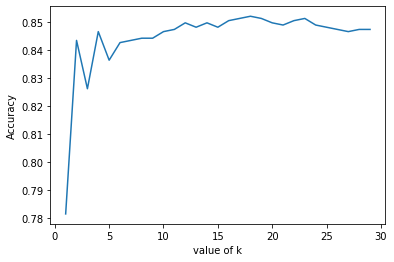

In [40]:
%matplotlib inline
plt.plot(k_range,scores_list)
plt.xlabel('value of k')
plt.ylabel('Accuracy')
plt.show()

In [41]:
knn = KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 2)
knn = knn.fit(X_train,y_train)
knn_y_pred = knn.predict(X_test)

In [42]:
conf_mat = confusion_matrix(y_test, knn_y_pred)

print('Confusion Matrix')
print(conf_mat)

TP = conf_mat[0,0]
TN = conf_mat[1,1]
FP = conf_mat[0,1]
FN = conf_mat[1,0]

accuracyk =  round( ((TP+TN)/(TP+TN+FP+FN))*100 , 2)
errork =  round( 100 - accuracyk , 2)

specificityk =  round( ((TN) / (TN + FP))*100 , 2)
sensitivityk =  round( ((TP) / (TP+FN))*100 , 2)
Recallk =  round( ((TP)/(TP+FN))*100 , 2) #sensitivity
Precisionk =  round( ((TP)/(TP+FP))*100 , 2)
f1_scorek =  round( ((2*Precisionk*Recallk)/(Precisionk+Recallk)) , 2)

print("Accuracy                  : ",accuracyk)
print('Classification Error Rate : ', errork)
print('specificity               : ',specificityk)
print('sensitivity or Recall     : ',sensitivityk)
print('Precision                 : ',Precisionk)
print('f1 score                  : ',f1_scorek)

Confusion Matrix
[[1071    6]
 [ 187    8]]
Accuracy                  :  84.83
Classification Error Rate :  15.17
specificity               :  57.14
sensitivity or Recall     :  85.14
Precision                 :  99.44
f1 score                  :  91.74


## Voting Classifier

In [43]:
table1={'Algorithm':['Logistic Regression','Random Forest','Naive Bayes','Decision Tree','SVM','KNN'],
    'Accuracy':[accuracyl,accuracyr,accuracyn,accuracyd,accuracys,accuracyk],
       'Classification Error Rate':[errorl,errorr,errorn,errord,errors,errork],
        'Specificity':[specificityl,specificityr,specificityn,specificityd,specificitys,specificityk],
        'Sensitivity':[sensitivityl,sensitivityr,sensitivityn,sensitivityd,sensitivitys,sensitivityk],
        'Precision': [Precisionl,Precisionr,Precisionn,Precisiond,Precisions,Precisionk]
}

In [44]:
table2=pd.DataFrame(table1,columns=['Algorithm','Accuracy','Classification Error Rate','Specificity','Sensitivity','Precision'])

In [45]:
table2=table2.sort_values(by ='Classification Error Rate')
table2

,Algorithm,Accuracy,Classification Error Rate,Specificity,Sensitivity,Precision
0,Logistic Regression,84.91,15.09,66.67,85.04,99.72
5,KNN,84.83,15.17,57.14,85.14,99.44
4,SVM,84.67,15.33,NaN,84.67,100.00
1,Random Forest,84.43,15.57,45.71,85.53,98.24
2,Naive Bayes,82.86,17.14,39.64,86.99,93.78
3,Decision Tree,76.42,23.58,25.12,86.62,85.33


## Voting Classifier

In [46]:
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = BernoulliNB()
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2),('nb',clf3)],voting='hard')
eclf.fit(X_train, y_train) 
y_pred = eclf.predict(X_test) 
  
# using accuracy_score metric to predict accuracy 
print ('Accuracy Score :', round( accuracy_score(y_test, y_pred)*100 , 2) )


Accuracy Score : 84.91


### EnsembleVoteClassifier

In [47]:
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.metrics import classification_report

logclf=LogisticRegression(penalty='l2',C=10, random_state=0)
treeclf=RandomForestClassifier(max_depth=3,criterion='entropy',random_state=0)
nb=BernoulliNB()

mv_clf= EnsembleVoteClassifier(clfs=[logclf,treeclf,nb],weights=[71,68,65])
mv_clf.fit(X_train,y_train)
v_y_pred=mv_clf.predict(X_test)

In [48]:
conf_mat = confusion_matrix(y_test, v_y_pred)

print('Confusion Matrix')
print(conf_mat)

TP = conf_mat[0,0]
TN = conf_mat[1,1]
FP = conf_mat[0,1]
FN = conf_mat[1,0]

accuracyv = round( ((TP+TN)/(TP+TN+FP+FN))*100 , 2)
errorv = round( 100 - accuracyv , 2)

specificityv = round( ((TN) / (TN + FP))*100 , 2)
sensitivityv = round( ((TP) / (TP+FN))*100 , 2)
Recallv = round( ((TP)/(TP+FN))*100 , 2) #sensitivity
Precisionv = round(  ((TP)/(TP+FP))*100 , 2)
f1_scorev = round( ((2*Precisionv*Recallv)/(Precisionv+Recallv)) , 2)

print("Accuracy                  : ",accuracyv)
print('Classification Error Rate : ', errorv)
print('specificity               : ',specificityv)
print('sensitivity or Recall     : ',sensitivityv)
print('Precision                 : ',Precisionv)
print('f1 score                  : ',f1_scorev)


Confusion Matrix
[[1076    1]
 [ 188    7]]
Accuracy                  :  85.14
Classification Error Rate :  14.86
specificity               :  87.5
sensitivity or Recall     :  85.13
Precision                 :  99.91
f1 score                  :  91.93


## Gradient boosting

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gb_y_pred = gbc.predict(X_test)


In [50]:
conf_mat = confusion_matrix(y_test, gb_y_pred)
print('Confusion Matrix')
print(conf_mat)

TP = conf_mat[0,0]
TN = conf_mat[1,1]
FP = conf_mat[0,1]
FN = conf_mat[1,0]

accuracyb = round ( ((TP+TN)/(TP+TN+FP+FN))*100 , 2)
errorb = round ( 100 - accuracyb , 2)

specificityb = round (  ((TN) / (TN + FP))*100 , 2)
sensitivityb = round (  ((TP) / (TP+FN))*100 , 2)
Recallb = round ( ((TP)/(TP+FN))*100 , 2) #sensitivity
Precisionb = round ( ((TP)/(TP+FP))*100 , 2)
f1_scoreb = round ( ((2*Precisionb*Recallb)/(Precisionb+Recallb)) , 2)

print("Accuracy                  : ",accuracyb)
print('Classification Error Rate : ', errorb)
print('specificity               : ',specificityb)
print('sensitivity or Recall     : ',sensitivityb)
print('Precision                 : ',Precisionb)
print('f1 score                  : ',f1_scoreb)

Confusion Matrix
[[1058   19]
 [ 178   17]]
Accuracy                  :  84.51
Classification Error Rate :  15.49
specificity               :  47.22
sensitivity or Recall     :  85.6
Precision                 :  98.24
f1 score                  :  91.49


## Adaboost

In [51]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=100)
classifier.fit(X_train, y_train)
ada_y_pred=classifier.predict(X_test)

In [52]:
conf_mat = confusion_matrix(y_test, ada_y_pred)

print('Confusion Matrix')
print(conf_mat)

TP = conf_mat[0,0]
TN = conf_mat[1,1]
FP = conf_mat[0,1]
FN = conf_mat[1,0]

accuracya = round ( ((TP+TN)/(TP+TN+FP+FN))*100 , 2)
errora = round ( 100 - accuracya , 2)

specificitya = round ( ((TN) / (TN + FP))*100 , 2)
sensitivitya = round ( ((TP) / (TP+FN))*100 , 2)
Recalla = round ( ((TP)/(TP+FN))*100 , 2) #sensitivity
Precisiona = round ( ((TP)/(TP+FP))*100 , 2)
f1_scorea = round ( ((2*Precisiona*Recalla)/(Precisiona+Recalla)) , 2)

print("Accuracy                  : ",accuracya)
print('Classification Error Rate : ', errora)
print('specificity               : ',specificitya)
print('sensitivity or Recall     : ',sensitivitya)
print('Precision                 : ',Precisiona)
print('f1 score                  : ',f1_scorea)

Confusion Matrix
[[1007   70]
 [ 164   31]]
Accuracy                  :  81.6
Classification Error Rate :  18.4
specificity               :  30.69
sensitivity or Recall     :  85.99
Precision                 :  93.5
f1 score                  :  89.59


# HYBRID MODEL

In [53]:
table={'Algorithm':['Logistic Regression','Random Forest','Naive Bayes','Decision Tree','SVM','KNN','GB','Adaboost'],
    'Accuracy':[accuracyl,accuracyr,accuracyn,accuracyd,accuracys,accuracyk,accuracyb,accuracya],
       'Classification Error Rate':[errorl,errorr,errorn,errord,errors,errork,errorb,errora],
        'Specificity':[specificityl,specificityr,specificityn,specificityd,specificitys,specificityk,specificityb,specificitya],
        'Sensitivity':[sensitivityl,sensitivityr,sensitivityn,sensitivityd,sensitivitys,sensitivityk,sensitivityb,sensitivitya],
        'Precision': [Precisionl,Precisionr,Precisionn,Precisiond,Precisions,Precisionk,Precisionb,Precisiona]
}


In [54]:
clf_table = pd.DataFrame(table,columns=['Algorithm','Accuracy','Classification Error Rate','Specificity','Sensitivity','Precision'])
clf_table = clf_table.sort_values(by ='Classification Error Rate')
clf_table

,Algorithm,Accuracy,Classification Error Rate,Specificity,Sensitivity,Precision
0,Logistic Regression,84.91,15.09,66.67,85.04,99.72
5,KNN,84.83,15.17,57.14,85.14,99.44
4,SVM,84.67,15.33,NaN,84.67,100.00
6,GB,84.51,15.49,47.22,85.60,98.24
1,Random Forest,84.43,15.57,45.71,85.53,98.24
2,Naive Bayes,82.86,17.14,39.64,86.99,93.78
7,Adaboost,81.60,18.40,30.69,85.99,93.50
3,Decision Tree,76.42,23.58,25.12,86.62,85.33


In [55]:
#Logistic Regression
lg=LogisticRegression()
lg.fit(X_train,y_train)

#predicted probabilities 
print(lg.predict_proba(X_test))

pp1=lg.predict_proba(X_test)
res3, res4=map(list,zip(*pp1))
print("logistic listing,,.,.,.")
print(res3)
print(res4)

[[0.89093775 0.10906225]
 [0.78490997 0.21509003]
 [0.84433267 0.15566733]
 ...
 [0.72829308 0.27170692]
 [0.94077031 0.05922969]
 [0.95351664 0.04648336]]
logistic listing,,.,.,.
[0.8909377520717863, 0.7849099651472877, 0.8443326743697667, 0.6372027809272951, 0.8865976740267876, 0.8775330757085965, 0.9462760385440581, 0.9349859558599372, 0.8718217932719321, 0.7664749991446361, 0.9599670797709272, 0.891129259719024, 0.7323907041383273, 0.9264418027660879, 0.9284120474673037, 0.8424479817940941, 0.7393714572796902, 0.8039040242009852, 0.6336358451057773, 0.8952769946533481, 0.9422265584283268, 0.8988016313841615, 0.7986090189195095, 0.9367540964635497, 0.8993285455305868, 0.9603508334058822, 0.9221826886922131, 0.9375652682468216, 0.9167310941607896, 0.8063214799551945, 0.8563911574427694, 0.9377442318048096, 0.7028572971895946, 0.7780488383325016, 0.9224017920077129, 0.9033616844100822, 0.8451234656200357, 0.9650342530605028, 0.9005652223550829, 0.9050638882628113, 0.9282114934491406, 

In [56]:
#Random Forest
rf=RandomForestClassifier(n_estimators=100,random_state=1,n_jobs=-1)
rf.fit(X_train,y_train)

print(rf.predict_proba(X_test))
pp=rf.predict_proba(X_test)
res1, res2=map(list,zip(*pp))
print("listing,,.,.,.")
print(res1)
print(res2)

[[0.91 0.09]
 [0.94 0.06]
 [0.95 0.05]
 ...
 [0.69 0.31]
 [0.9  0.1 ]
 [0.89 0.11]]
listing,,.,.,.
[0.91, 0.94, 0.95, 0.7, 0.91, 0.81, 0.98, 0.98, 0.98, 0.56, 0.96, 0.96, 0.86, 0.84, 0.97, 0.88, 0.88, 0.83, 0.72, 0.96, 0.71, 0.98, 0.9, 0.94, 0.93, 0.96, 0.89, 0.97, 0.88, 0.84, 0.92, 0.95, 0.67, 0.72, 0.89, 0.82, 0.75, 0.87, 0.92, 0.64, 0.92, 0.82, 0.86, 0.92, 0.76, 0.98, 0.59, 0.66, 0.98, 0.88, 0.99, 0.58, 0.89, 0.78, 0.82, 0.68, 0.81, 0.88, 0.86, 0.81, 1.0, 0.88, 0.87, 0.89, 0.91, 0.78, 0.56, 0.79, 0.87, 0.94, 0.77, 0.91, 0.98, 0.73, 0.85, 0.93, 0.93, 0.69, 0.92, 0.94, 0.63, 0.89, 0.87, 0.7, 0.97, 0.94, 0.93, 0.66, 0.77, 0.83, 0.92, 0.96, 0.65, 0.94, 0.6, 0.89, 0.93, 0.69, 0.56, 0.97, 0.97, 0.94, 0.82, 0.79, 0.99, 0.95, 0.97, 0.82, 0.96, 0.84, 0.96, 0.92, 0.97, 0.99, 0.93, 0.89, 0.34, 0.85, 0.94, 0.91, 0.79, 0.67, 0.77, 0.79, 0.71, 0.84, 0.81, 0.66, 0.88, 0.67, 0.94, 0.76, 0.78, 0.86, 0.99, 0.86, 0.93, 0.84, 0.9, 0.97, 0.92, 0.83, 0.93, 0.91, 0.89, 0.89, 0.92, 0.72, 0.92, 0.65, 0.92, 

In [57]:
scores= []
s=lg.predict_proba(X_test)
r=rf.predict_proba(X_test)

for w in range(0, 100):
    w=w/100
    scores.append(log_loss(y_test,w*r+(1-w)*s))

b=min(scores)
we=scores.index(b)/100
print('optimum weight obtained: ',we)

optimum weight obtained:  0.58


In [58]:
y_pred= []
for i in range(len(res1)):
    a1=we*res1[i]+(1-we)*res3[i]
    a2=we*res2[i]+(1-we)*res4[i]
    if a1>a2:
        y_pred.append(0)
    else:
        y_pred.append(1)

#Predicted values for testing data
print("Predicted values")
print(y_pred)

Predicted values
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

### Performance metrics for Hybrid model

In [59]:
print('Confusion Matrix')
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

TP = conf_mat[0,0]
TN = conf_mat[1,1]
FP = conf_mat[0,1]
FN = conf_mat[1,0]

accuracyh = round ( ((TP+TN)/(TP+TN+FP+FN))*100 , 2)
errorh =  round ( 100-accuracyh , 2)
specificityh =  round ( ((TN) / (TN + FP))*100 , 2)
sensitivityh =  round ( ((TP) / (TP+FN))*100 , 2)
Recallh =  round ( ((TP)/(TP+FN))*100 , 2) #sensitivity
Precisionh =  round ( ((TP)/(TP+FP))*100 , 2)
f1_scoreh =  round ( ((2*Precisionh*Recallh)/(Precisionh+Recallh)) , 2)

print("Accuracy                  : ",accuracyh)
print("Classification Error rate : ",errorh)
print('specificity               : ',specificityh)
print('sensitivity or Recall     : ',sensitivityh)
print('Precision                 : ',Precisionh)
print('f1 score                  : ',f1_scoreh)


Confusion Matrix
[[1075    2]
 [ 185   10]]
Accuracy                  :  85.3
Classification Error rate :  14.7
specificity               :  83.33
sensitivity or Recall     :  85.32
Precision                 :  99.81
f1 score                  :  92.0


# Deep Learning

In [60]:
X=data[['male','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']]

X_train, X_test, y_train, y_test = train_test_split(X, y_values, test_size=0.3, random_state=42)

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(30, input_dim=15, activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,y_train, epochs=100, verbose=1)
Y_pred = model.predict(X_test)
score=model.evaluate(X_test,y_test)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
2968/2968 [==============================] - 1s 217us/sample - loss: 0.4240 - acc: 0.8487
Epoch 2/100
2968/2968 [==============================] - 0s 79us/sample - loss: 0.4164 - acc: 0.8487
Epoch 3/100
2968/2968 [==============================] - 0s 62us/sample - loss: 0.4114 - acc: 0.8487
Epoch 4/100
2968/2968 [==============================] - 0s 61us/sample - loss: 0.4115 - acc: 0.8487
Epoch 5/100
2968/2968 [==============================] - 0s 66us/sample - loss: 0.4094 - acc: 0.8487
Epoch 6/100
2968/2968 [==============================] - 0s 62us/sample - loss: 0.4075 - acc: 0.8487
Epoch 7/100
2968/2968 [==============================] - 0s 72us/sample - loss: 0.4068 - acc: 0.8487
Epoch 8/100
2968/2968 [==============================] - 0s 75us/sample - loss: 

2968/2968 [==============================] - ETA: 0s - loss: 0.4127 - acc: 0.840 - 0s 55us/sample - loss: 0.3980 - acc: 0.8484
Epoch 75/100
2968/2968 [==============================] - 0s 58us/sample - loss: 0.3976 - acc: 0.8487
Epoch 76/100
2968/2968 [==============================] - 0s 57us/sample - loss: 0.3992 - acc: 0.8501
Epoch 77/100
2968/2968 [==============================] - 0s 59us/sample - loss: 0.3994 - acc: 0.8467
Epoch 78/100
2968/2968 [==============================] - 0s 55us/sample - loss: 0.3966 - acc: 0.8504
Epoch 79/100
2968/2968 [==============================] - 0s 53us/sample - loss: 0.4058 - acc: 0.8504
Epoch 80/100
2968/2968 [==============================] - 0s 63us/sample - loss: 0.3972 - acc: 0.8501
Epoch 81/100
2968/2968 [==============================] - 0s 80us/sample - loss: 0.3959 - acc: 0.8487
Epoch 82/100
2968/2968 [==============================] - 0s 73us/sample - loss: 0.3982 - acc: 0.8484
Epoch 83/100
2968/2968 [==============================] -

In [62]:
model.summary()
score = model.evaluate(X_test, y_test, verbose=0)
print("score")
print(score)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________
score
[0.41302967933738755, 0.8490566]


In [63]:
deepaccuracy = round( score[1]*100 , 2)
deeperror = round( 100 - deepaccuracy ,2 )
print('Accuracy                  : ',deepaccuracy)
print('Classification Error Rate : ',deeperror)

Accuracy                  :  84.91
Classification Error Rate :  15.09


In [64]:
print(history.history.keys())

dict_keys(['loss', 'acc'])


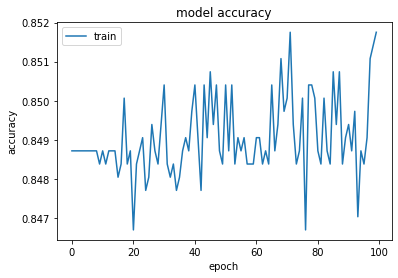

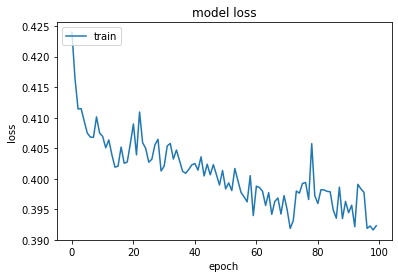

In [65]:

plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['train','test'],loc='upper left')
plt.show()

# Genetic algorithm

In [66]:
X = data.iloc[:,:-1].values
y = data.iloc[:, 15].values

est = LogisticRegression()

class GeneticSelector():
    def __init__(self, estimator, n_gen, size, n_best, n_rand, 
                 n_children, mutation_rate):
        # Estimator 
        self.estimator = estimator
        # Number of generations
        self.n_gen = n_gen
        # Number of chromosomes in population
        self.size = size
        # Number of best chromosomes to select
        self.n_best = n_best
        # Number of random chromosomes to select
        self.n_rand = n_rand
        # Number of children created during crossover
        self.n_children = n_children
        # Probablity of chromosome mutation
        self.mutation_rate = mutation_rate
        
        if int((self.n_best + self.n_rand) / 2) * self.n_children != self.size:
            raise ValueError("The population size is not stable.")  
            
    def initilize(self):
        population = []
        for i in range(self.size):
            chromosome = np.ones(self.n_features, dtype=np.bool)
            mask = np.random.rand(len(chromosome)) < 0.3
            chromosome[mask] = False
            population.append(chromosome)
        return population
    

    def fitness(self, population):
        X, y = self.dataset
        scores = []
        for chromosome in population:
            score = -1.0 * np.mean(cross_val_score(self.estimator, X[:,chromosome], y, 
                                                       cv=5, 
                                                       scoring="neg_mean_squared_error"))
            scores.append(score)
        scores, population = np.array(scores), np.array(population) 
        inds = np.argsort(scores)
        return list(scores[inds]), list(population[inds,:])

    def select(self, population_sorted):
        population_next = []
        for i in range(self.n_best):
            population_next.append(population_sorted[i])
        for i in range(self.n_rand):
            population_next.append(random.choice(population_sorted))
        random.shuffle(population_next)
        return population_next

    def crossover(self, population):
        population_next = []
        for i in range(int(len(population)/2)):
            for j in range(self.n_children):
                chromosome1, chromosome2 = population[i], population[len(population)-1-i]
                child = chromosome1
                mask = np.random.rand(len(child)) > 0.5
                child[mask] = chromosome2[mask]
                population_next.append(child)
        return population_next
	
    def mutate(self, population):
        population_next = []
        for i in range(len(population)):
            chromosome = population[i]
            if random.random() < self.mutation_rate:
                mask = np.random.rand(len(chromosome)) < 0.05
                chromosome[mask] = False
            population_next.append(chromosome)
        return population_next

    def generate(self, population):
        # Selection, crossover and mutation
        scores_sorted, population_sorted = self.fitness(population)
        population = self.select(population_sorted)
        population = self.crossover(population)
        population = self.mutate(population)
        # History
        self.chromosomes_best.append(population_sorted[0])
        self.scores_best.append(scores_sorted[0])
        self.scores_avg.append(np.mean(scores_sorted))
        
        return population
    

    def fit(self, X, y):
 
        self.chromosomes_best = []
        self.scores_best, self.scores_avg  = [], []
        
        self.dataset = X, y
        self.n_features = X.shape[1]
        
        population = self.initilize()
        for i in range(self.n_gen):
            population = self.generate(population)
            
        return self 
    
    
    def support_(self):
        return self.chromosomes_best[-1]


sel = GeneticSelector(estimator=LogisticRegression(), 
                      n_gen=7, size=200, n_best=40, n_rand=40, 
                      n_children=5, mutation_rate=0.05)
sel.fit(X,y)
score = cross_val_score(est, X, y,scoring="accuracy")

print("Selected Features: %s" % sel.support_())


Selected Features: [ True  True  True  True  True  True  True  True False False  True  True
  True False  True]


In [67]:

X=data[['male','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose','TenYearCHD']]

feature_selected = pd.DataFrame(list(zip(sel.support_(),X)),columns=['feature','selected'])
feature_selected = feature_rank.sort_values(by ='rank')
feature_selected

,rank,feature
12,1,BMI
10,2,sysBP
9,3,totChol
14,4,glucose
11,5,diaBP
1,6,age
13,7,heartRate
4,8,cigsPerDay
2,9,education
0,10,male


In [68]:
accuracyg = round( 100*np.mean(score) , 2)
print('Accuracy                  : ', accuracyg)

errorg = round( 100-accuracyg ,2)
print('Classification Error Rate : ',errorg)

Accuracy                  :  85.09
Classification Error Rate :  14.91


# Results

In [69]:
table1={'Algorithm':['Naive Bayes','Logistic Regression','Decision Tree','Random Forest','SVM','KNN','Voting','Gradient Boosting','Adaboost','Hybrid','Deep Learning','Genetic algorithm'],
    'Accuracy':[accuracyn,accuracyl,accuracyd,accuracyr,accuracys,accuracyk,accuracyv,accuracyb,accuracya,accuracyh,deepaccuracy,accuracyg],
       'Classification Error Rate':[errorn,errorl,errord,errorr,errors,errork,errorv,errorb,errora,errorh,deeperror,errorg]
}

In [70]:
table2=pd.DataFrame(table1,columns=['Algorithm','Accuracy','Classification Error Rate'])
table2=table2.sort_values(by ='Classification Error Rate')

In [71]:
table2

,Algorithm,Accuracy,Classification Error Rate
9,Hybrid,85.30,14.70
6,Voting,85.14,14.86
11,Genetic algorithm,85.09,14.91
1,Logistic Regression,84.91,15.09
10,Deep Learning,84.91,15.09
5,KNN,84.83,15.17
4,SVM,84.67,15.33
7,Gradient Boosting,84.51,15.49
3,Random Forest,84.43,15.57
0,Naive Bayes,82.86,17.14


# Graph

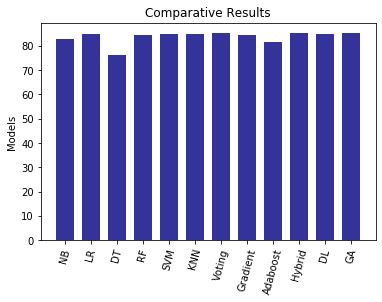

In [72]:
objects = ('NB','LR','DT', 'RF', 'SVM','KNN','Voting','Gradient','Adaboost' ,'Hybrid','DL','GA')
y_pos = np.arange(len(objects))
performance = [accuracyn,accuracyl,accuracyd,accuracyr,accuracys,accuracyk,accuracyv,accuracyb,accuracya,accuracyh,deepaccuracy,accuracyg]

plt.bar(y_pos, performance, align='center',width=0.7, alpha=0.8,color='navy')
plt.xticks(y_pos, objects,rotation=75)
plt.ylabel('Models')
plt.title('Comparative Results')
plt.show()

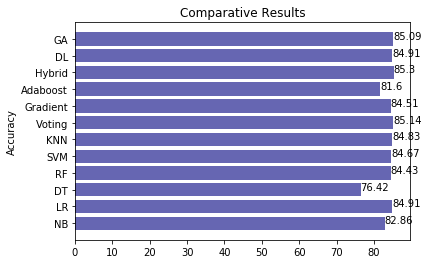

In [73]:
objects = ('NB','LR','DT', 'RF', 'SVM','KNN','Voting','Gradient','Adaboost' ,'Hybrid','DL','GA')
y_pos = np.arange(len(objects))
performance = [accuracyn,accuracyl,accuracyd,accuracyr,accuracys,accuracyk,accuracyv,accuracyb,accuracya,accuracyh,deepaccuracy,accuracyg]

plt.barh(objects,performance, align='center', alpha=0.6,color='navy')
for index, value in enumerate(performance):
    plt.text(value, index, str(value))

#plt.xticks(y_pos, objects,rotation=50)
plt.ylabel('Accuracy')
plt.title('Comparative Results')
plt.show()